In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

In [2]:
df1: pd.DataFrame = pd.read_excel("hw-02b-data/us-population-1610-2020.xlsx")
df1.head()

,Year,Population
0,1610,350
1,1620,2302
2,1630,4646
3,1640,26634
4,1650,50368


In [9]:
df1_1660_1860 = df1[(df1["Year"] >= 1660) & (df1["Year"] <= 1860)]

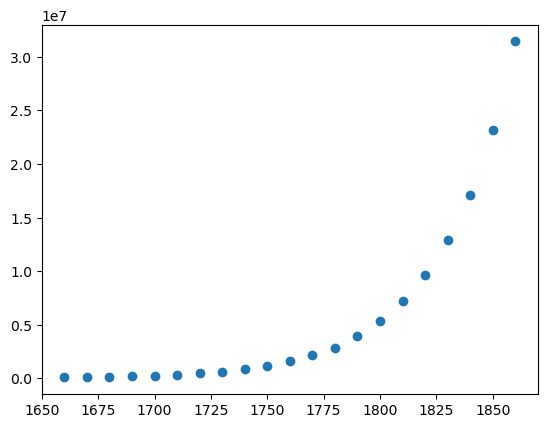

In [11]:
plt.scatter(df1_1660_1860["Year"], df1_1660_1860["Population"])

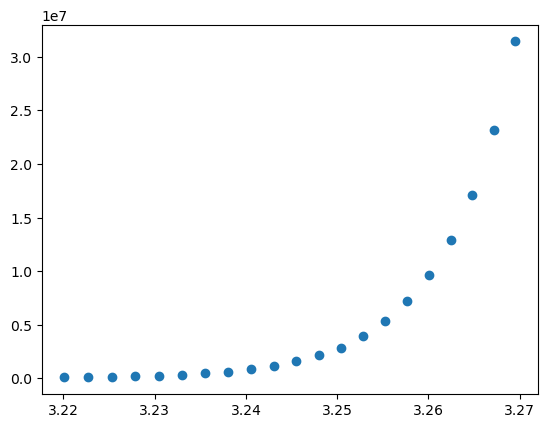

In [12]:
plt.scatter(np.log10(df1_1660_1860["Year"]), df1_1660_1860["Population"])

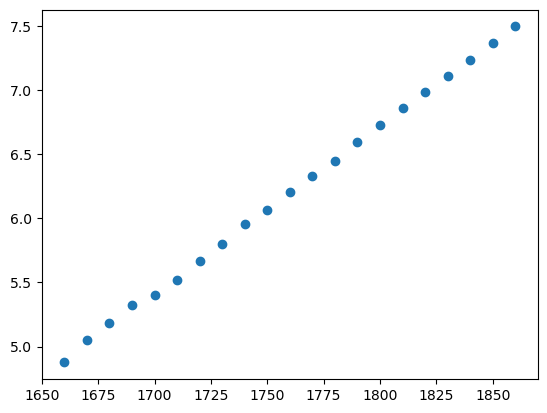

In [16]:
plt.scatter(df1_1660_1860["Year"], np.log10(df1_1660_1860["Population"]))

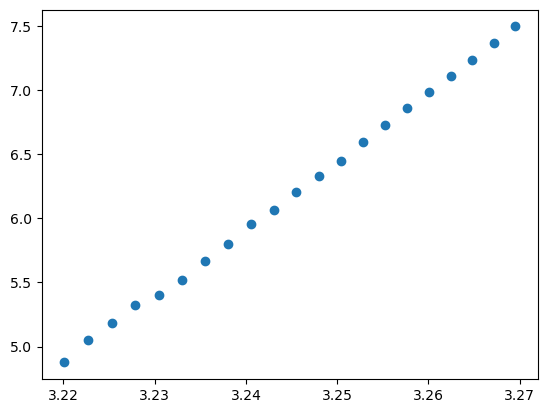

In [15]:
plt.scatter(np.log10(df1_1660_1860["Year"]), np.log10(df1_1660_1860["Population"]))

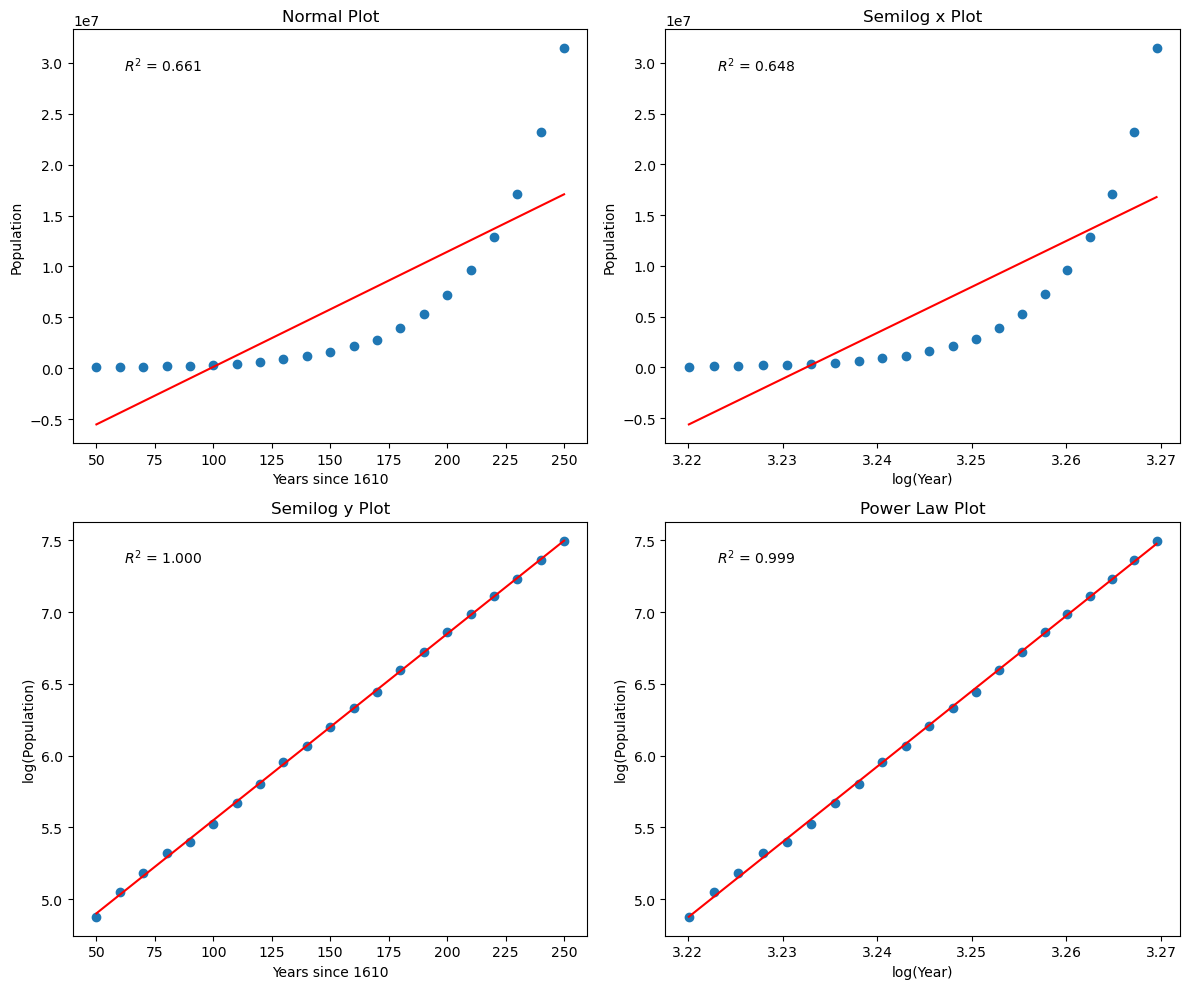

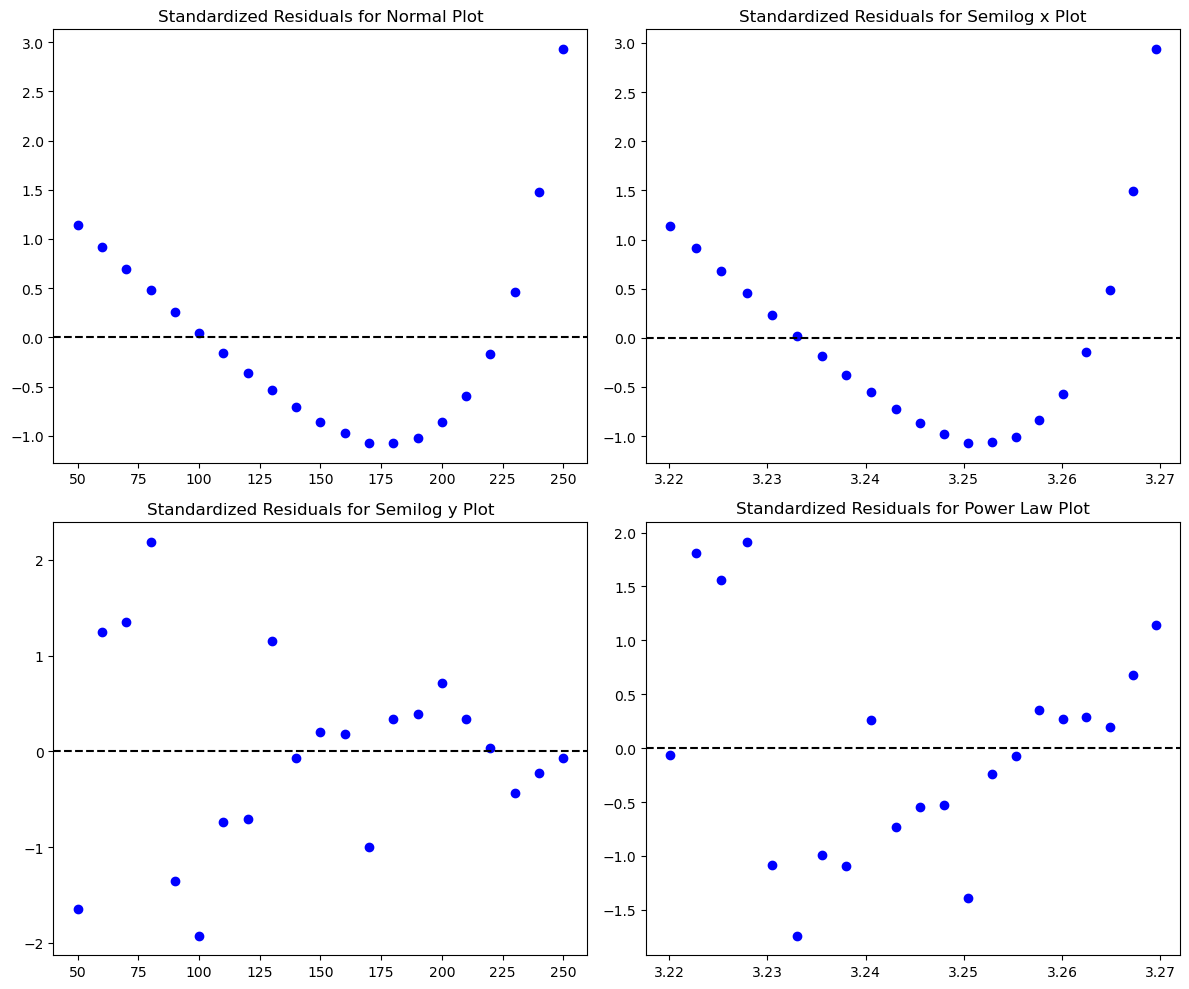

Population = 113012.58 * (Years since 1610) + -11165592.08
Population = 453077170.05 * log(Year) + -1464564817.10
log(Population) = 0.012992 * (Years since 1610) + 4.250554
Population = 17805.496 * 10^0.013(Years since 1610)


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data (assuming you have already done this)
# df1 = pd.read_excel("hw-02b-data/us-population-1610-2020.xlsx")
df1_1660_1860 = df1[(df1["Year"] >= 1660) & (df1["Year"] <= 1860)]

# Create 2x2 grid for main plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting data and line of best fit for each format
# Plotting data and line of best fit for each format
x = df1_1660_1860["Year"].values - 1610  # <-- Change here
y = df1_1660_1860["Population"].values

x_log = np.log10(x + 1610)  # This remains the same as we're still considering actual years for the log transformation
y_log = np.log10(y)

# Define a function to plot data, fit line, and return residuals and R^2
def plot_and_fit(x, y, ax, xlabel, ylabel):
    ax.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    r2 = r2_score(y, m*x + b)
    ax.text(0.1, 0.9, f'$R^2$ = {r2:.3f}', transform=ax.transAxes)
    residuals = y - (m*x + b)
    return residuals

# Normal plot
res_normal = plot_and_fit(x, y, axs[0, 0], 'Years since 1610', 'Population')  # <-- Change in label

# Semilog x plot
res_x_log = plot_and_fit(x_log, y, axs[0, 1], 'log(Year)', 'Population')

# Semilog y plot
res_y_log = plot_and_fit(x, y_log, axs[1, 0], 'Years since 1610', 'log(Population)')  # <-- Change in label

# Power law plot
res_power_law = plot_and_fit(x_log, y_log, axs[1, 1], 'log(Year)', 'log(Population)')

axs[0, 0].set_title('Normal Plot')
axs[0, 1].set_title('Semilog x Plot')
axs[1, 0].set_title('Semilog y Plot')
axs[1, 1].set_title('Power Law Plot')

fig.savefig("plots/prob1_plots.png")
plt.tight_layout()
plt.show()

# Define a function to calculate standardized residuals
def standardize_residuals(residuals):
    std_dev = np.std(residuals)
    return residuals / std_dev

# Standardize the residuals
std_res_normal = standardize_residuals(res_normal)
std_res_x_log = standardize_residuals(res_x_log)
std_res_y_log = standardize_residuals(res_y_log)
std_res_power_law = standardize_residuals(res_power_law)

# Create 2x2 grid for standardized residual plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# For standardized residuals, adjust x-axis for only those plots which are not on a log scale
axs[0, 0].scatter(x, std_res_normal, color='blue')  # No changes needed here, as x already represents years since 1610
axs[0, 1].scatter(x_log, std_res_x_log, color='blue')  # No changes needed here
axs[1, 0].scatter(x, std_res_y_log, color='blue')  # No changes needed here
axs[1, 1].scatter(x_log, std_res_power_law, color='blue')  # No changes needed here

axs[0, 0].axhline(0, color='black', linestyle='--')
axs[0, 1].axhline(0, color='black', linestyle='--')
axs[1, 0].axhline(0, color='black', linestyle='--')
axs[1, 1].axhline(0, color='black', linestyle='--')

# Label the residual plots
axs[0, 0].set_title('Standardized Residuals for Normal Plot')
axs[0, 1].set_title('Standardized Residuals for Semilog x Plot')
axs[1, 0].set_title('Standardized Residuals for Semilog y Plot')
axs[1, 1].set_title('Standardized Residuals for Power Law Plot')


fig.savefig("plots/prob1_resid.png")
plt.tight_layout()
plt.show()

m_normal, b_normal = np.polyfit(x, y, 1)
# Output formulas
print(f"Population = {m_normal:.2f} * (Years since 1610) + {b_normal:.2f}")  # <-- Adjusted print
print(f"Population = {m_x_log:.2f} * log(Year) + {b_x_log:.2f}")
print(f"log(Population) = {m_y_log:.6f} * (Years since 1610) + {b_y_log:.6f}")  # <-- Adjusted print
print(f"Population = {10**b_y_log:.3f} * 10^{m_y_log:.3f}(Years since 1610)")

# Problem 2

In [33]:
df2 = pd.read_excel("hw-02b-data/rocket-delta-v.xlsx")
df2.head()

,Unnamed: 0,Mass Ratio,Delta V
0,0,1.000000,0.000000
1,1,2.020408,3131.020819
2,2,3.040816,4948.731616
3,3,4.061224,6214.089684
4,4,5.081633,7216.625882


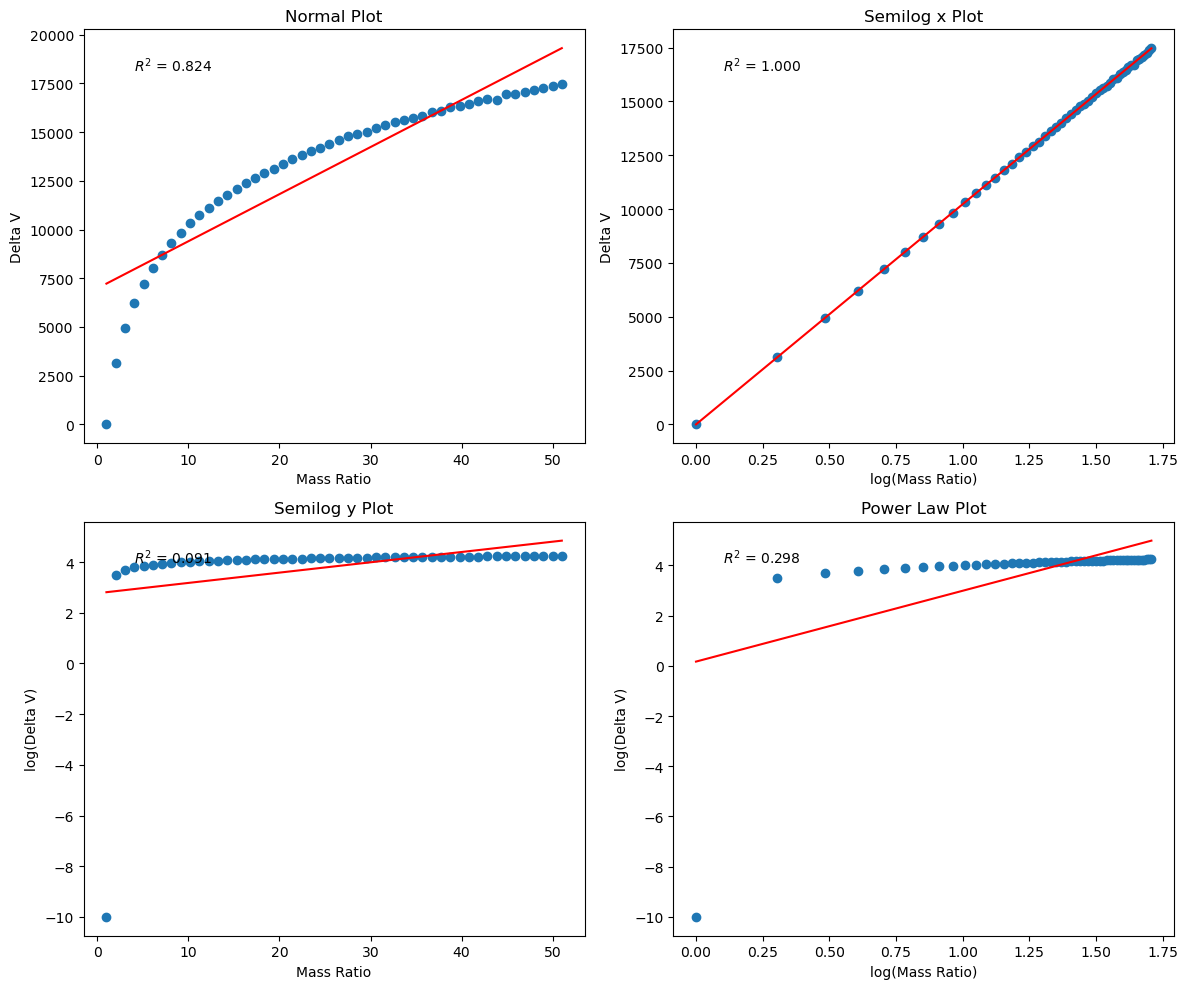

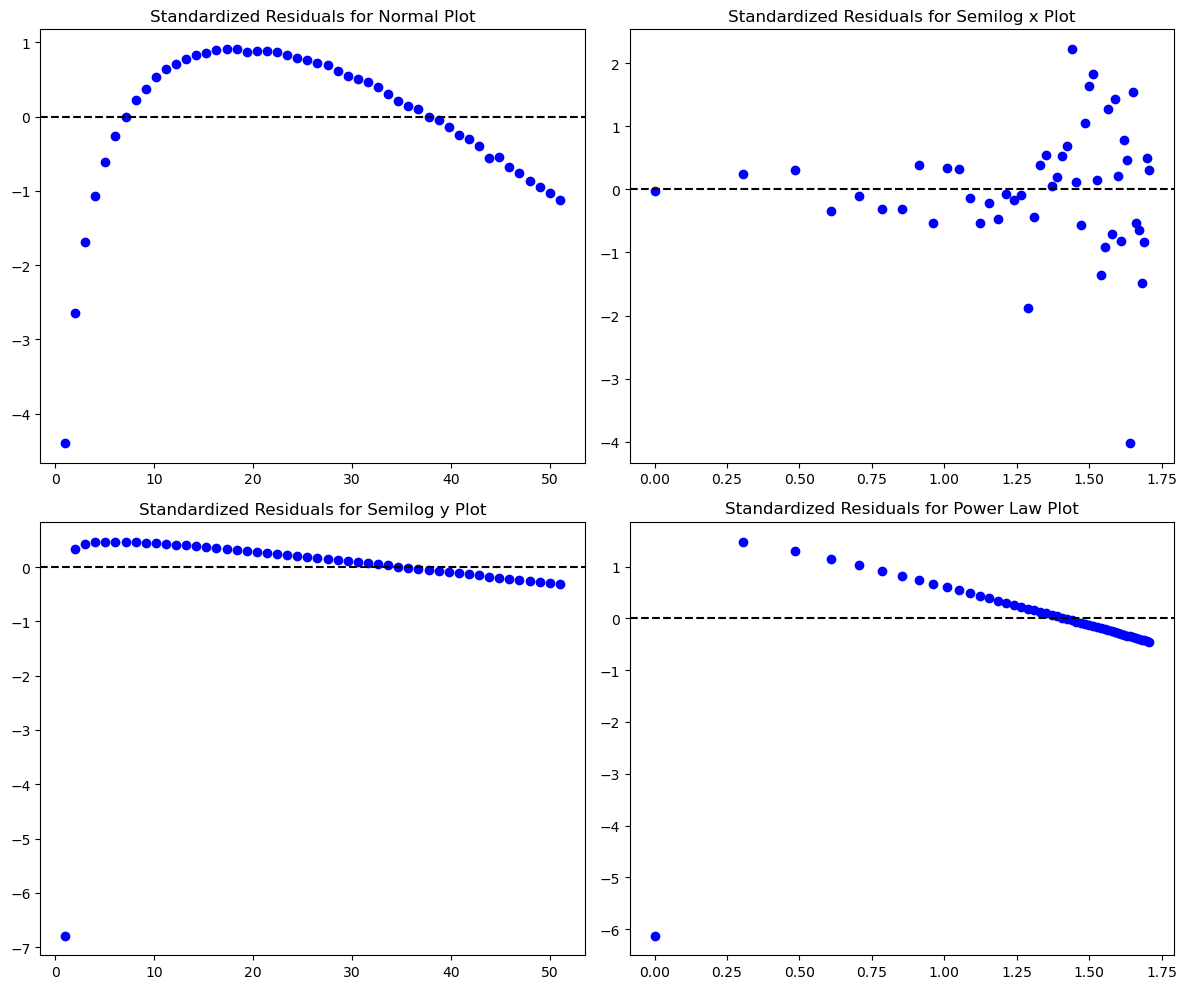

Delta V = 241.729067 * Mass Ratio + 6984.538722
Delta V = 10225.290305 * log(Mass Ratio) + 0.636494
log(Delta V) = 0.040684 * Mass Ratio + 2.770843
Delta V = 589.987721 * 10^0.040684Mass Ratio
log(Delta V) = 0.040684 * log(Mass Ratio) + 2.770843
Delta V = 589.988 * Mass Ratio^0.041


In [36]:
# Assuming df2 is already loaded with the data for Problem 2

# Create 2x2 grid for main plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Extract data from df2
x2 = df2["Mass Ratio"].values
y2 = df2["Delta V"].values

x2_log = np.log10(x2)
epsilon = 1e-10
y2_log = np.log10(y2 + epsilon)


# Normal plot for df2
res2_normal = plot_and_fit(x2, y2, axs[0, 0], 'Mass Ratio', 'Delta V')

# Semilog x plot for df2
res2_x_log = plot_and_fit(x2_log, y2, axs[0, 1], 'log(Mass Ratio)', 'Delta V')

# Semilog y plot for df2
res2_y_log = plot_and_fit(x2, y2_log, axs[1, 0], 'Mass Ratio', 'log(Delta V)')

# Power law plot for df2
res2_power_law = plot_and_fit(x2_log, y2_log, axs[1, 1], 'log(Mass Ratio)', 'log(Delta V)')

axs[0, 0].set_title('Normal Plot')
axs[0, 1].set_title('Semilog x Plot')
axs[1, 0].set_title('Semilog y Plot')
axs[1, 1].set_title('Power Law Plot')

fig.savefig("plots/prob2_plots.png")
plt.tight_layout()
plt.show()

# Standardize the residuals for df2
std_res2_normal = standardize_residuals(res2_normal)
std_res2_x_log = standardize_residuals(res2_x_log)
std_res2_y_log = standardize_residuals(res2_y_log)
std_res2_power_law = standardize_residuals(res2_power_law)

# Create 2x2 grid for standardized residual plots for df2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(x2, std_res2_normal, color='blue')
axs[0, 1].scatter(x2_log, std_res2_x_log, color='blue')
axs[1, 0].scatter(x2, std_res2_y_log, color='blue')
axs[1, 1].scatter(x2_log, std_res2_power_law, color='blue')

axs[0, 0].axhline(0, color='black', linestyle='--')
axs[0, 1].axhline(0, color='black', linestyle='--')
axs[1, 0].axhline(0, color='black', linestyle='--')
axs[1, 1].axhline(0, color='black', linestyle='--')

# Label the residual plots for df2
axs[0, 0].set_title('Standardized Residuals for Normal Plot')
axs[0, 1].set_title('Standardized Residuals for Semilog x Plot')
axs[1, 0].set_title('Standardized Residuals for Semilog y Plot')
axs[1, 1].set_title('Standardized Residuals for Power Law Plot')

fig.savefig("plots/prob2_resid.png")
plt.tight_layout()
plt.show()

m2_normal, b2_normal = np.polyfit(x2, y2, 1)
m2_x_log, b2_x_log = np.polyfit(x2_log, y2, 1)
m2_y_log, b2_y_log = np.polyfit(x2, y2_log, 1)

# Output formulas for df2
print(f"Delta V = {m2_normal:.6f} * Mass Ratio + {b2_normal:.6f}")
print(f"Delta V = {m2_x_log:.6f} * log(Mass Ratio) + {b2_x_log:.6f}")
print(f"log(Delta V) = {m2_y_log:.6f} * Mass Ratio + {b2_y_log:.6f}")
print(f"Delta V = {10**b2_y_log:.6f} * 10^{m2_y_log:.6f}Mass Ratio")


# Formulas derived from log-log plot (Power Law)
a_power_law = 10**b2_y_log
n_power_law = m2_y_log
print(f"log(Delta V) = {n_power_law:.6f} * log(Mass Ratio) + {np.log10(a_power_law):.6f}")
print(f"Delta V = {a_power_law:.3f} * Mass Ratio^{n_power_law:.3f}")

# Problem 3

In [39]:
df3 = pd.read_excel("hw-02b-data/planet-orbital-periods.xlsx")
df3

,Name,Distance [km],Period [days]
0,Mercury,57900000,88.0
1,Venus,108200000,224.7
2,Earth,149600000,365.2
3,Mars,227900000,687.0
4,Jupiter,778600000,4331.0
5,Saturn,1433500000,10747.0
6,Uranus,2872500000,30589.0
7,Neptune,4495100000,59800.0
8,Pluto,5906400000,90560.0


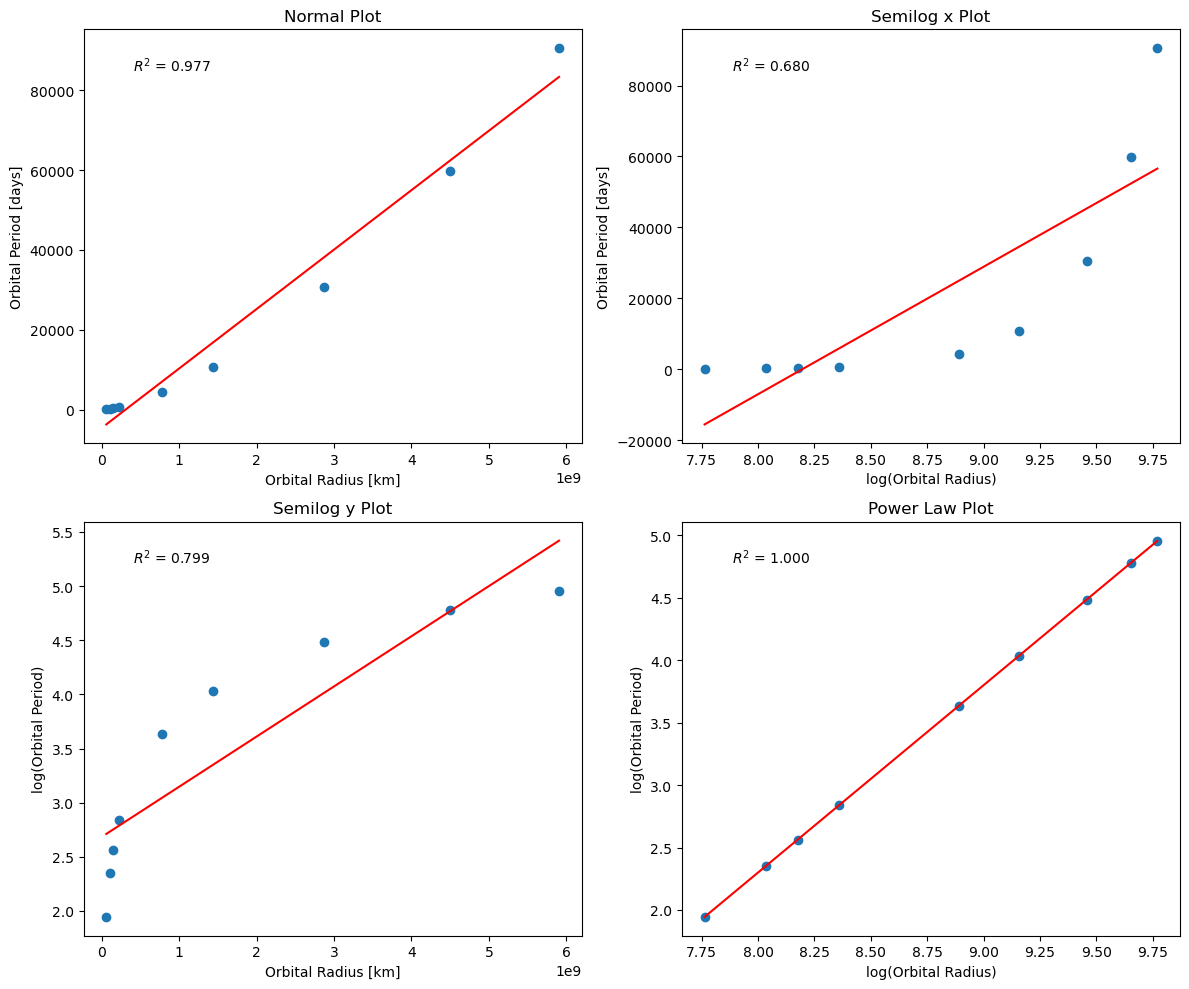

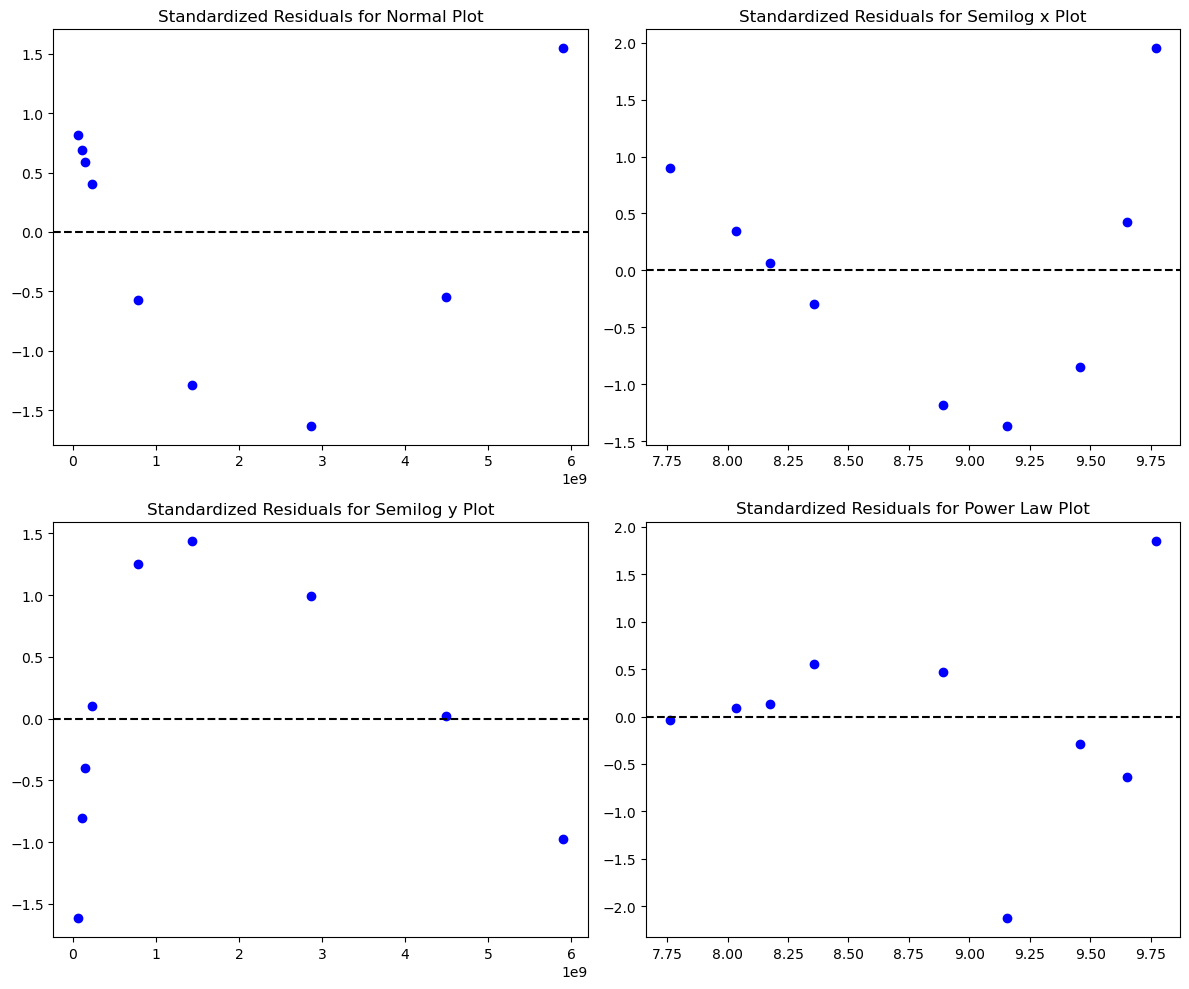

Orbital Period = 0.00 * Orbital Radius + -4587.28
Orbital Period = 35924.19 * log(Orbital Radius) + -294438.39
log(Orbital Period) = 0.000000 * Orbital Radius + 2.684175
log(Orbital Period) = 1.498800 * log(Orbital Radius) + -9.690180
Orbital Period = 0.000 * Orbital Radius^1.499


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Given data
data = {
    'Name': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'],
    'Distance [km]': [57900000, 108200000, 149600000, 227900000, 778600000, 1433500000, 2872500000, 4495100000, 5906400000],
    'Period [days]': [88.0, 224.7, 365.2, 687.0, 4331.0, 10747.0, 30589.0, 59800.0, 90560.0]
}
df3 = pd.DataFrame(data)

x3 = df3["Distance [km]"].values
y3 = df3["Period [days]"].values

epsilon = 1e-10
x3_log = np.log10(x3 + epsilon)
y3_log = np.log10(y3 + epsilon)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

def plot_and_fit(x, y, ax, xlabel, ylabel):
    ax.scatter(x, y)
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    r2 = r2_score(y, m*x + b)
    ax.text(0.1, 0.9, f'$R^2$ = {r2:.3f}', transform=ax.transAxes)
    residuals = y - (m*x + b)
    return residuals

res_normal = plot_and_fit(x3, y3, axs[0, 0], 'Orbital Radius [km]', 'Orbital Period [days]')
res_x_log = plot_and_fit(x3_log, y3, axs[0, 1], 'log(Orbital Radius)', 'Orbital Period [days]')
res_y_log = plot_and_fit(x3, y3_log, axs[1, 0], 'Orbital Radius [km]', 'log(Orbital Period)')
res_power_law = plot_and_fit(x3_log, y3_log, axs[1, 1], 'log(Orbital Radius)', 'log(Orbital Period)')

axs[0, 0].set_title('Normal Plot')
axs[0, 1].set_title('Semilog x Plot')
axs[1, 0].set_title('Semilog y Plot')
axs[1, 1].set_title('Power Law Plot')

fig.savefig("plots/prob3_plots.png")
plt.tight_layout()
plt.show()

def standardize_residuals(residuals):
    std_dev = np.std(residuals)
    return residuals / std_dev

std_res_normal = standardize_residuals(res_normal)
std_res_x_log = standardize_residuals(res_x_log)
std_res_y_log = standardize_residuals(res_y_log)
std_res_power_law = standardize_residuals(res_power_law)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(x3, std_res_normal, color='blue')
axs[0, 1].scatter(x3_log, std_res_x_log, color='blue')
axs[1, 0].scatter(x3, std_res_y_log, color='blue')
axs[1, 1].scatter(x3_log, std_res_power_law, color='blue')

for ax in axs.ravel():
    ax.axhline(0, color='black', linestyle='--')

axs[0, 0].set_title('Standardized Residuals for Normal Plot')
axs[0, 1].set_title('Standardized Residuals for Semilog x Plot')
axs[1, 0].set_title('Standardized Residuals for Semilog y Plot')
axs[1, 1].set_title('Standardized Residuals for Power Law Plot')

fig.savefig("plots/prob3_resid.png")
plt.tight_layout()
plt.show()

# Regression parameters for all plots
m_normal, b_normal = np.polyfit(x3, y3, 1)
m_x_log, b_x_log = np.polyfit(x3_log, y3, 1)
m_y_log, b_y_log = np.polyfit(x3, y3_log, 1)
m_power_law, b_power_law = np.polyfit(x3_log, y3_log, 1)

print(f"Orbital Period = {m_normal:.2f} * Orbital Radius + {b_normal:.2f}")
print(f"Orbital Period = {m_x_log:.2f} * log(Orbital Radius) + {b_x_log:.2f}")
print(f"log(Orbital Period) = {m_y_log:.6f} * Orbital Radius + {b_y_log:.6f}")
print(f"log(Orbital Period) = {m_power_law:.6f} * log(Orbital Radius) + {b_power_law:.6f}")
print(f"Orbital Period = {10**b_power_law:.3f} * Orbital Radius^{m_power_law:.3f}")
